In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drimages/Dataset/valid/Mild/13569_right_png.rf.176957c7fe86ce43c70e8dbd76f62e81.jpg
/kaggle/input/drimages/Dataset/valid/Mild/11005_left_png.rf.e4ec0af7b5c23a25097a79927fd17449.jpg
/kaggle/input/drimages/Dataset/valid/Mild/13945_right_png.rf.6121f89fad6dbe6e038c05c958411873.jpg
/kaggle/input/drimages/Dataset/valid/Mild/8339_left_png.rf.7aa4e5637d00e45dd42b1ddd3eecfa55.jpg
/kaggle/input/drimages/Dataset/valid/Mild/14356_right_png.rf.461706c0d5771e0a22badc5b94565c05.jpg
/kaggle/input/drimages/Dataset/valid/Mild/15083_right_png.rf.425611f13379cb9541ab7e4af912fd2f.jpg
/kaggle/input/drimages/Dataset/valid/Mild/4534_right_png.rf.71e1853c93333fe72e350c43dcea175c.jpg
/kaggle/input/drimages/Dataset/valid/Mild/2965_right_png.rf.2c3de67dd2c30ac76f3896e0767769e1.jpg
/kaggle/input/drimages/Dataset/valid/Mild/4769_left_png.rf.77f26451050ac7b78be5d496ff833d79.jpg
/kaggle/input/drimages/Dataset/valid/Mild/4470_left_png.rf.286fbf0ce30227b2a051d7e9ae1f698e.jpg
/kaggle/input/drimages/Datase

In [2]:
# Install gdown if not already
!pip install gdown

# Replace FILE_ID with your Google Drive file ID
!gdown --id 1CKHC8PwzhXpVzzfhCHTTVbECdaddu7be

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CKHC8PwzhXpVzzfhCHTTVbECdaddu7be
From (redirected): https://drive.google.com/uc?id=1CKHC8PwzhXpVzzfhCHTTVbECdaddu7be&confirm=t&uuid=14b7bf0f-7362-4cc4-894e-56d4c1ad0c12
To: /kaggle/working/Dataset.zip
100%|██████████████████████████████████████| 23.8M/23.8M [00:00<00:00, 32.3MB/s]


In [3]:
!unzip -q your_dataset.zip

unzip:  cannot find or open your_dataset.zip, your_dataset.zip.zip or your_dataset.zip.ZIP.


In [4]:
import tensorflow as tf

# Print GPU device
device_name = tf.config.list_physical_devices('GPU')
print("GPU available:", device_name)

2025-04-16 15:12:17.651021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744816337.856377      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744816337.914460      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [5]:
pip install tensorflow scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.applications import EfficientNetB0

2025-04-16 16:42:24.401231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744821744.666645      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744821744.772755      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
image_size = (224, 224)
batch_size = 32
num_classes = 5
epochs = 30

base_dir = "/kaggle/input/drimages/Dataset"

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(base_dir, "valid"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Save label names
class_names = list(train_generator.class_indices.keys())

Found 3665 images belonging to 5 classes.
Found 916 images belonging to 5 classes.


In [4]:
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(),

        Flatten(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [5]:
def create_resnet():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [6]:
def create_vgg():
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [7]:
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input

def build_efficientnet_model(num_classes, input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # fine-tune later if needed

    inputs = Input(shape=input_shape)
    x = effnet_preprocess(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

In [9]:
 models = {
    "CNN": create_cnn(),
    "ResNet50": create_resnet(),
    "VGG16": create_vgg(),
    "EfficientNetB0": build_efficientnet_model(num_classes)
}

results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    checkpoint_path = f"{name}_best_model.keras"
    callbacks = [
        EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
        ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)
    ]

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=valid_generator,
        callbacks=callbacks
    )

    val_loss, val_acc = model.evaluate(valid_generator)
    y_pred = model.predict(valid_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = valid_generator.classes

    print(f"\nClassification Report for {name}:\n")
    report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)
    results[name] = {
        "accuracy": val_acc,
        "loss": val_loss,
        "report": report,
        "history": history.history,
        "model_path": checkpoint_path
    }


Training model: CNN
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744821913.165110     109 service.cc:148] XLA service 0x7f62d4002ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744821913.166277     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744821913.166299     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744821913.656390     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/115 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.2188 - loss: 22.6138 

I0000 00:00:1744821919.443067     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


115/115 ━━━━━━━━━━━━━━━━━━━━ 67s 472ms/step - accuracy: 0.2086 - loss: 14.3619 - val_accuracy: 0.2020 - val_loss: 2.2487
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 353ms/step - accuracy: 0.2222 - loss: 1.7194 - val_accuracy: 0.2085 - val_loss: 1.9517
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 347ms/step - accuracy: 0.2222 - loss: 1.7453 - val_accuracy: 0.2151 - val_loss: 1.6248
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 347ms/step - accuracy: 0.2224 - loss: 2.1215 - val_accuracy: 0.2162 - val_loss: 1.5988
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 335ms/step - accuracy: 0.2186 - loss: 1.6213 - val_accuracy: 0.2151 - val_loss: 1.6056
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - accuracy: 0.2236 - loss: 1.6540 - val_accuracy: 0.2151 - val_loss: 1.6244
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 334ms/step - accuracy: 0.2265 - loss: 1.6664 - val_accuracy: 0.2151 - val_loss: 1.7624
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 334ms/step - accuracy: 0.2081 - loss: 1.6387 - va

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 72s 469ms/step - accuracy: 0.2132 - loss: 1.7891 - val_accuracy: 0.2369 - val_loss: 1.5993
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 45s 369ms/step - accuracy: 0.2120 - loss: 1.6165 - val_accuracy: 0.2162 - val_loss: 1.6052
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 389ms/step - accuracy: 0.2145 - loss: 1.6080 - val_accuracy: 0.2162 - val_loss: 1.6025
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 389ms/step - accuracy: 0.2155 - loss: 1.6065 - val_accuracy: 0.2140 - val_loss: 1.6024
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 374ms/step - accuracy: 0.2138 - loss: 1.6070 - val_accuracy: 0.2336 - val_loss: 1.6008
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 378ms/step - accuracy: 0.2198 - loss: 1.6058 - val_accuracy: 0.2336 - val_loss: 1.5958
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2622 - loss: 1.5770
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step

Classification Report for ResNet50:


Training model: VGG16


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 91s 617ms/step - accuracy: 0.2122 - loss: 1.7640 - val_accuracy: 0.1823 - val_loss: 1.6038
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 51s 420ms/step - accuracy: 0.2284 - loss: 1.6126 - val_accuracy: 0.2271 - val_loss: 1.5697
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 51s 421ms/step - accuracy: 0.2368 - loss: 1.5909 - val_accuracy: 0.2358 - val_loss: 1.5656
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 51s 422ms/step - accuracy: 0.2311 - loss: 1.5876 - val_accuracy: 0.2445 - val_loss: 1.5582
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 410ms/step - accuracy: 0.2563 - loss: 1.5661 - val_accuracy: 0.2598 - val_loss: 1.5452
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 48s 398ms/step - accuracy: 0.2480 - loss: 1.5693 - val_accuracy: 0.2740 - val_loss: 1.5518
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 48s 391ms/step - accuracy: 0.2474 - loss: 1.5603 - val_accuracy: 0.2828 - val_loss: 1.5300
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 386ms/step - accuracy: 0.2596 - loss: 1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


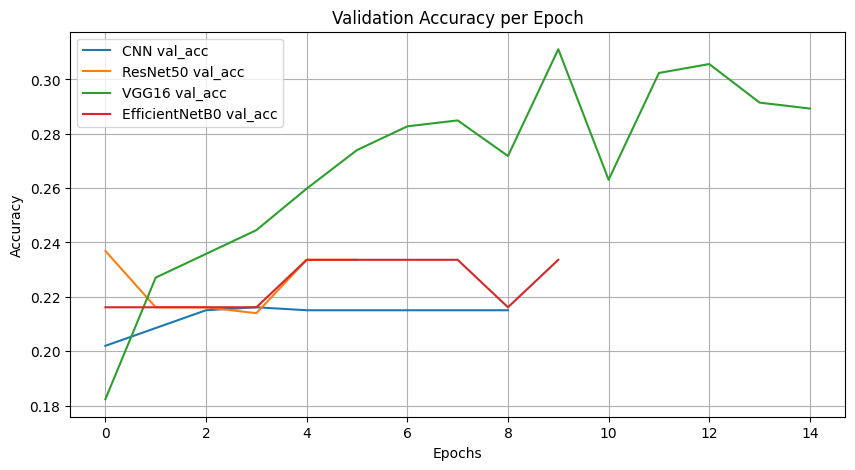


📊 Classification Report for CNN
                precision  recall  f1-score  support
Mild                 0.00    0.00      0.00   214.00
Moderate             0.00    0.00      0.00   214.00
No_DR                0.22    1.00      0.36   198.00
Proliferate_DR       0.00    0.00      0.00   124.00
Severe               0.00    0.00      0.00   166.00
accuracy             0.22    0.22      0.22     0.22
macro avg            0.04    0.20      0.07   916.00
weighted avg         0.05    0.22      0.08   916.00

📊 Classification Report for ResNet50
                precision  recall  f1-score  support
Mild                 0.21    0.03      0.05   214.00
Moderate             0.24    0.95      0.38   214.00
No_DR                0.23    0.04      0.06   198.00
Proliferate_DR       0.00    0.00      0.00   124.00
Severe               0.00    0.00      0.00   166.00
accuracy             0.24    0.24      0.24     0.24
macro avg            0.14    0.20      0.10   916.00
weighted avg         0.16   

In [11]:
import pandas as pd
# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
for name in results:
    plt.plot(results[name]["history"]["val_accuracy"], label=f"{name} val_acc")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Classification Reports
for name in results:
    print(f"\n📊 Classification Report for {name}")
    report = results[name]["report"]
    df = pd.DataFrame(report).transpose()
    print(df.round(2))

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adjust path to your dataset
train_dir = '/kaggle/input/drimages/Dataset/train'
val_dir = '/kaggle/input/drimages/Dataset/valid'

image_size = (224, 224)  # Should match the input_shape you use in your models
batch_size = 32

# Data augmentation & normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import clone_model

input_shape = (224, 224, 3)  # ✅ Define this based on your actual image size

best_model_name = None
best_val_acc = 0.0
best_model_path = "best_model.keras"
history_dict = {}

for name, base_model in models.items():
    print(f"\nTraining model: {name}")
    
    model = clone_model(base_model)
    model.build(input_shape=(None, *input_shape))  # ✅ Fixed input_shape
    model.set_weights(base_model.get_weights())

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    checkpoint_path = f"{name}_best_model.keras"
    callbacks = [
        EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
        ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True)
    ]

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=30,
        callbacks=callbacks,
        verbose=1
    )

    val_loss, val_acc = model.evaluate(val_generator)
    history_dict[name] = history

    print(f"{name} validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_name = name
        model.save(best_model_path)

print(f"\n✅ Best model: {best_model_name} with accuracy: {best_val_acc:.4f}")

Found 3665 images belonging to 5 classes.
Found 916 images belonging to 5 classes.

Training model: CNN
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 54s 400ms/step - accuracy: 0.2118 - loss: 2.0283 - val_accuracy: 0.2151 - val_loss: 1.6352
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.2257 - loss: 1.7949 - val_accuracy: 0.2151 - val_loss: 1.6566
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - accuracy: 0.2231 - loss: 1.6148 - val_accuracy: 0.2140 - val_loss: 1.6276
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.2103 - loss: 1.7557 - val_accuracy: 0.2151 - val_loss: 1.6984
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - accuracy: 0.2208 - loss: 1.6357 - val_accuracy: 0.2151 - val_loss: 1.8763
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - accuracy: 0.2246 - loss: 1.6657 - val_accuracy: 0.2151 - val_loss: 1.6582
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.2180 - loss: 1.6420
CNN validation accuracy: 0.2151, loss: 1.6352

Training model: ResNet50
Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 67s 430ms/step - accuracy: 0.2165 - los

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = ['mild', 'moderate', 'no_dr', 'proliferate_dr', 'severe']

def test_single_image(image_path, model_path="best_model.keras", target_size=(224, 224)):
    model = load_model(model_path)

    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"Predicted Class: {predicted_class} | Confidence: {confidence:.4f}")

In [28]:
test_single_image("/kaggle/input/drimages/Dataset/valid/Proliferate_DR/10017_left_png.rf.e2ec5b8f3fab22e4019d383c0b871c2e.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
Predicted Class: proliferate_dr | Confidence: 0.3211
